___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Как работать с выбросами (outliers)
Часто, во многих задачах, данные не готовы. Сначала их нужно очистить, а также подготовить более полезные признаки. 

В статистике "выброс" (outlier) - это точка данных, которая существенно отличается от других точек. Выбросы могут возникать из-за ошибок измерения, или например из-за ошибок эксперимента (в этом случае их иногда исключают из набора данных). Выбросы могут приводит к проблемам в применении статистических методов анализа данных.

Помните, что даже если точка данных является выбросом, это всё ещё точка данных! Аккуратно изучайте данные, откуда они пришли, и как Вы планируете использовать эти данные - и только тогда решайте, удалять или не удалять те или иные выбросы. Случаи бывают разные!


## Цели лекции
* Рассмотреть различные математические определения выбросов
* Использовать инструменты Python для поиска и удаления выбросов

### Три основных подхода:
1. Извлечение информации (extract)

    *Пример*: **1900-12-01 09:26:03**. Разделить на отделные признаки (год/месяц/день и тд)

    *Пример*: **текстовые данные**.

2. Комбинирование информации (combine)

    *Пример*: **Полиномиальная регрессия**.

    *Пример*: **вечер рабочего дня (0/1)**. Комбинирование отдельных признаков.


3. Преоразование информации (transform)

    *Пример*: **Категориальные/Текстовые данные**. (USA,UK,MEX)

    *Решение*: Integer-encoding /  One-hot-encoding.

#### Полезные ссылки

* [Статья в википедии](https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0))
* [Ссылки NIST Outlier](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)

-------------

# Imports

#### Какое значение считать выбросом (outliers)?
* **Диапазоны и лимиты**

    Решения: 
    1. Интерквартильный диапазон.

        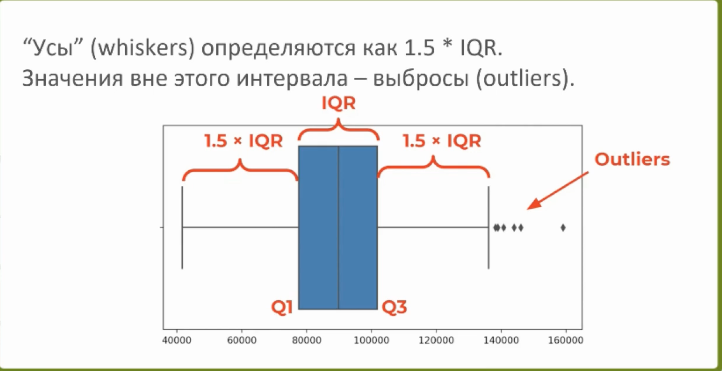
    
    2. Среднеквадратичное отклонение.

        Все что отличается на 3 сигмы от среднего значения, считать за выброс. (В случае Норм. расп.)

    3. Визуализация или знания о природе признака. 

* **Процент строк данных**

    * Если большой процент строк выглядит как выбросы, то это просто широкий диапазон возможных значений признака. 
    * Процент выбросов не должен превышать максимум нескольких процентов. (В идеале <1%)


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Генерируем данные

In [3]:
# Указываем среднее значение, среднеквадратическое отклонение и количество сэмплов

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Указываем значение random seed в той же ячейке, что и вызов метода random - это нужно для того, чтобы получить те же самые данные
    # Мы используем значение 42 (42 это число из комедийного сериала Автостопом по Галактике - 
    # Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [4]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

## Визуализация и описание данных

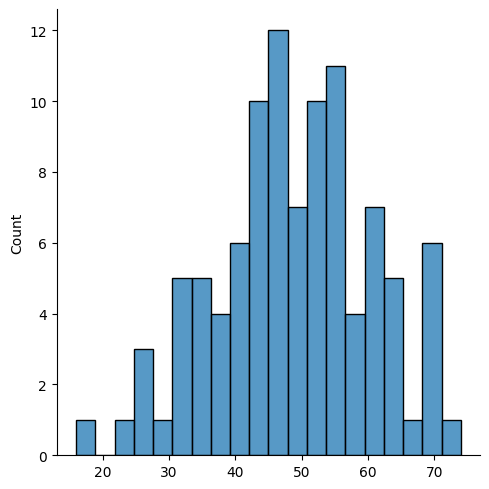

In [5]:
sns.displot(sample, bins=20);

<Axes: >

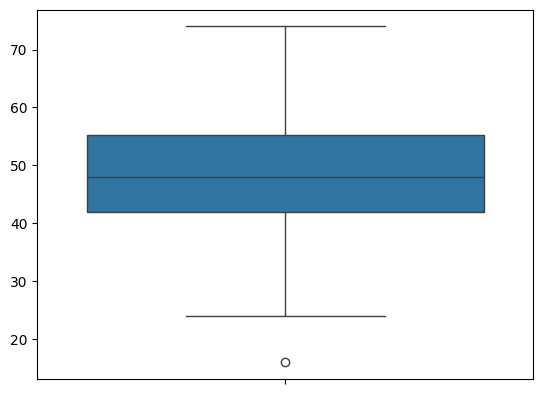

In [6]:
sns.boxplot(sample)

In [7]:
# describe полезен для получения значении 25-75% 
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

## Усечение или исправление данных на основе знаний о данных

Если мы знаем, что работаем с данными только тех, кто имеет право голосовать (с 18 лет), то мы можем удалить все значения меньше 18 лет, ИЛИ заменить такие значения значением 18.

In [8]:
ser[ser > 18]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [9]:
# Мы удалили одного человека
len(ser[ser > 18])

99

In [10]:
def fix_values(age):
    
    if age < 18:
        return 18
    else:
        return age

In [11]:
# "Исправляем" возраст одного человека
ser.apply(fix_values)

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [12]:
len(ser.apply(fix_values))

100

--------

Есть много способов найти и удалить выбросы:
* Усечение данных на основе некоторого порогового значения
* Усечение на основе IQR (interquantile range - межквантильный размах) или STD (standard deviation - среднеквадратическое отклонение)
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

## Набор данных "Ames Data Set"

Давайте найдём выбросы в нашем наборе данных Ames Housing Data Set

In [13]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [14]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<Axes: >

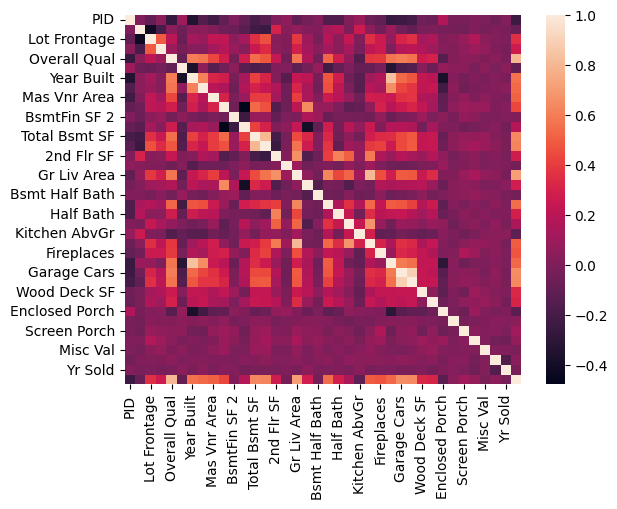

In [16]:
sns.heatmap(df.corr(numeric_only=True), )

In [18]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

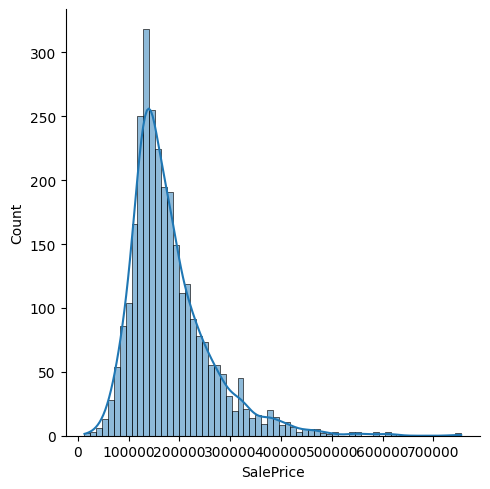

In [24]:
sns.displot(df["SalePrice"], kde=True);

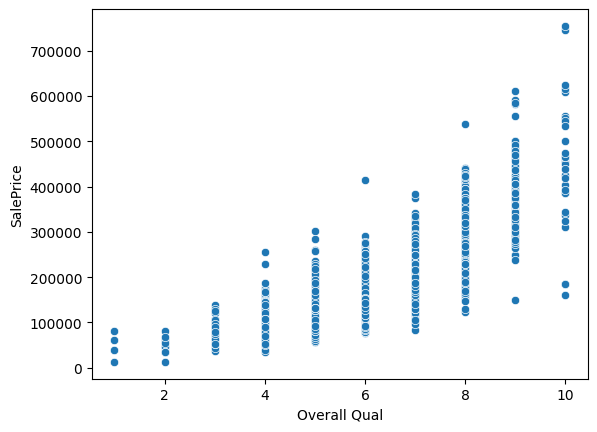

In [25]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [31]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


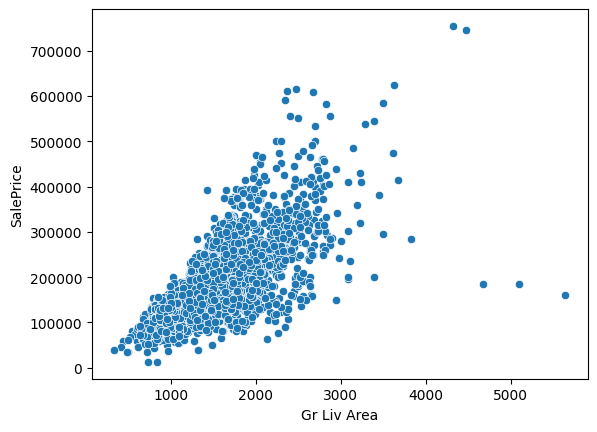

In [26]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

In [32]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [33]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [34]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [35]:
df = df.drop(ind_drop,axis=0)

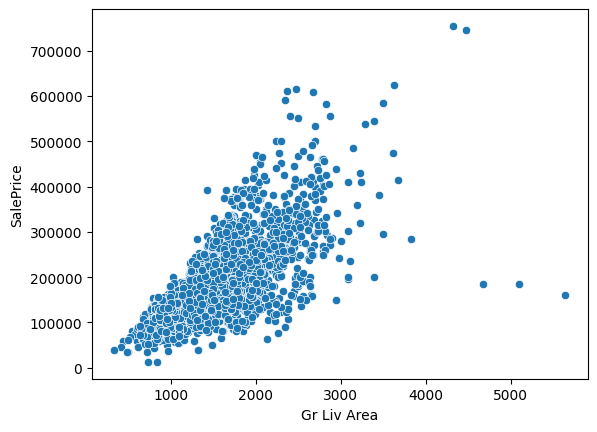

In [27]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

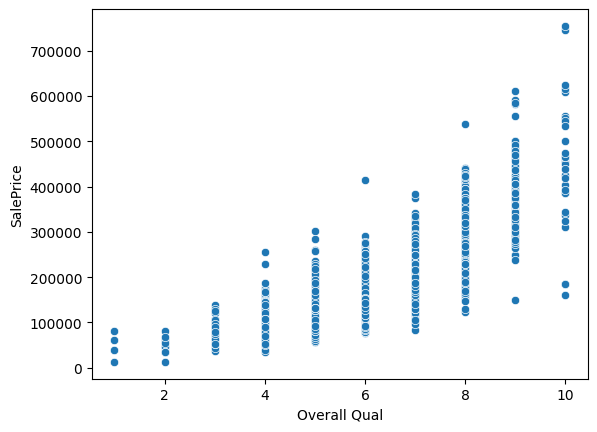

In [28]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [38]:
df.to_csv("../DATA/Ames_outliers_removed.csv",index=False)

----